In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2

In [27]:
def trocar_matiz(img, m, x):
  # Converte img para HSV
  img = img.astype(np.float32)/255
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Pega a dimensão da Matiz no array HSV
  matiz = hsv[:, :, 0]

  # Calcula os valores corrigidos para min e max
  min = (m - x) % 360
  max = (m + x) % 360

  print(min, ' e ', max)
  if min<max:
    mascara = np.logical_and(matiz >= min, matiz <= max)
  else:
    mascara = np.logical_or(matiz >= min, matiz <= max)
  
  matiz[mascara] = (matiz[mascara] + 180) % 360 # soma 180 para pegar o inverso, e % 360 para normalizar o resultado

  # Atualiza a dimensão da matiz no array HSV
  hsv[:, :, 0] = matiz

  # Converte novamente o array hsv agora para RGB
  return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

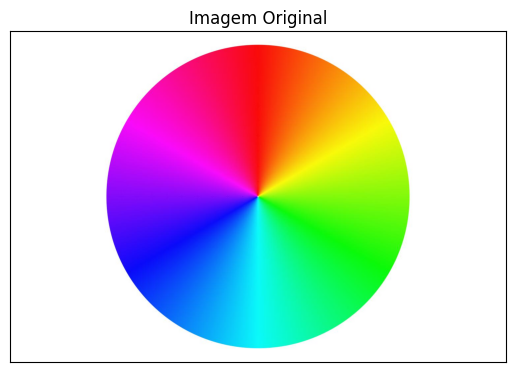

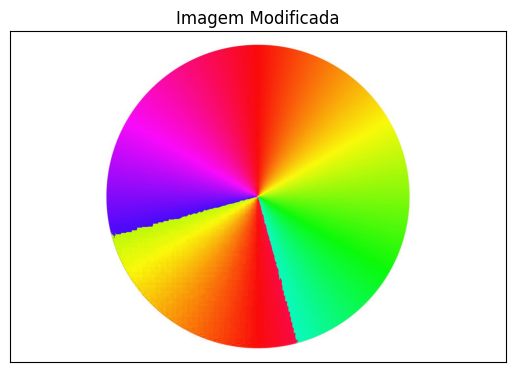

In [28]:
img = cv2.imread('images/cassioTarzan.jpg')

#Pega os valores de M e X e converte para inteiro
m = int(input())
x = int(input())


final = trocar_matiz(img, m, x)

#Printa a imagem original
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.xticks([])
plt.yticks([])
plt.show()

#Printa a imagem modificada
plt.imshow(final)
plt.title("Imagem Modificada")
plt.xticks([])
plt.yticks([])
plt.show()